Central Limit Theorem Experiment

1. Generating population (not normal)
Population size: 153056
Population mean: 2.00
Population std: 1.99

2. Observing the population distribution

3. Testing Central Limit Theorem


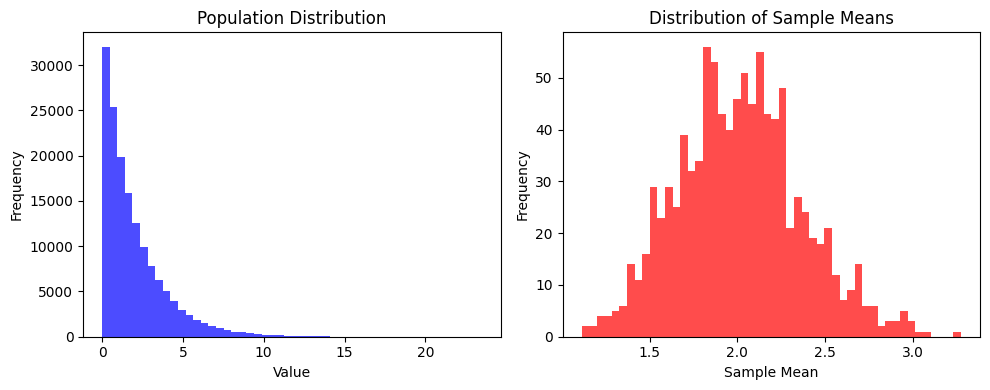


Sample means - Mean: 2.01
Sample means - Std: 0.35

4. Comparing different sample sizes
n=5: mean=1.98, std=0.84
n=30: mean=2.01, std=0.36
n=100: mean=1.99, std=0.20


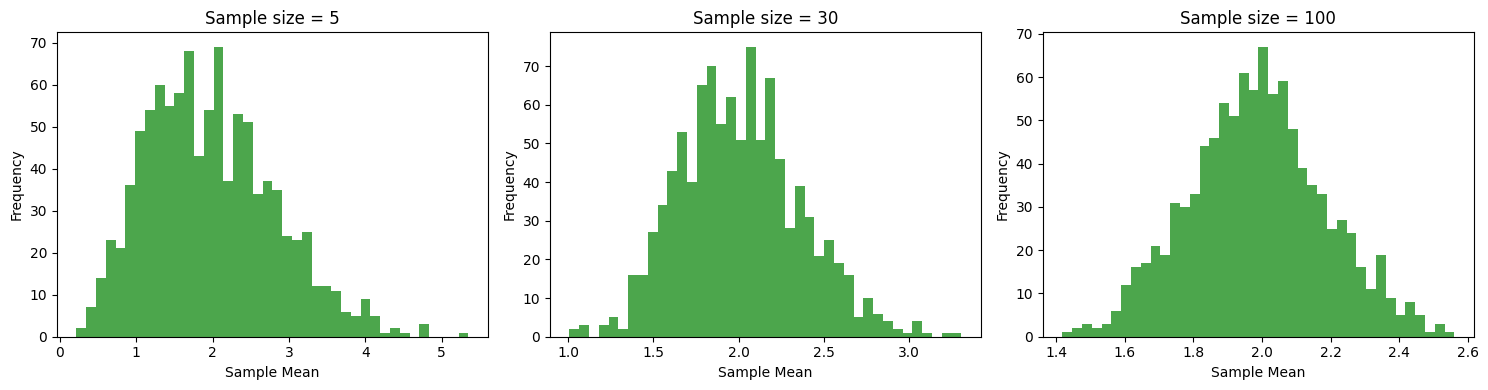

In [ ]:
#task 1
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

print("Central Limit Theorem Experiment")
print("=" * 50)

# 1 Generate a population which is not normally distributed

print("\n1. Generating population (not normal)")

population = np.random.exponential(scale=2, size=153056)

print(f"Population size: {len(population)}")
print(f"Population mean: {np.mean(population):.2f}")
print(f"Population std: {np.std(population):.2f}")


# 2 Observe the distribution of your generated data

print("\n2. Observing the population distribution")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='blue', alpha=0.7)
plt.title('Population Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 3 Create a code/procedure to observe the Central Limit Theorem

print("\n3. Testing Central Limit Theorem")

sample_size = 30  
num_samples = 1000 

sample_means = []

for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    mean = np.mean(sample)
    sample_means.append(mean)

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=50, color='red', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"\nSample means - Mean: {np.mean(sample_means):.2f}")
print(f"sample means - Std: {np.std(sample_means):.2f}")
print("\n4. comparing different sample sizes")

sample_sizes = [5, 30, 100]

plt.figure(figsize=(15, 4))

for i, n in enumerate(sample_sizes):
    means = []
    for j in range(1000):
        sample = np.random.choice(population, size=n)
        means.append(np.mean(sample))
    

    plt.subplot(1, 3, i+1)
    plt.hist(means, bins=40, color='green', alpha=0.7)
    plt.title(f'Sample size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    
    print(f"n={n}: mean={np.mean(means):.2f}, std={np.std(means):.2f}")

plt.tight_layout()
plt.show()


Law of Large Numbers Experiment

1. Generating population
Population size: 100000
Population mean: 4.99
Distribution: Uniform from 0 to 10

2. Testing Law of Large Numbers
Sample size    10: mean = 5.2199, difference from population = 0.2250
Sample size    50: mean = 5.6146, difference from population = 0.6197
Sample size   100: mean = 5.1396, difference from population = 0.1447
Sample size   500: mean = 4.8382, difference from population = 0.1567
Sample size  1000: mean = 4.9927, difference from population = 0.0021
Sample size  5000: mean = 5.0507, difference from population = 0.0558
Sample size 10000: mean = 5.0133, difference from population = 0.0184


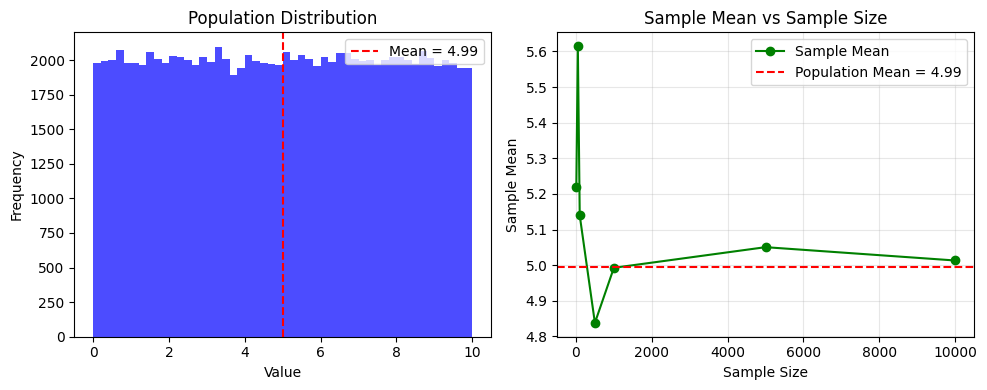


3. Running multiple trials
At n=  10, variance of sample means = 0.859952
At n=  50, variance of sample means = 0.120971
At n= 100, variance of sample means = 0.058727
At n= 200, variance of sample means = 0.030662
At n= 500, variance of sample means = 0.014405
At n=1000, variance of sample means = 0.008440


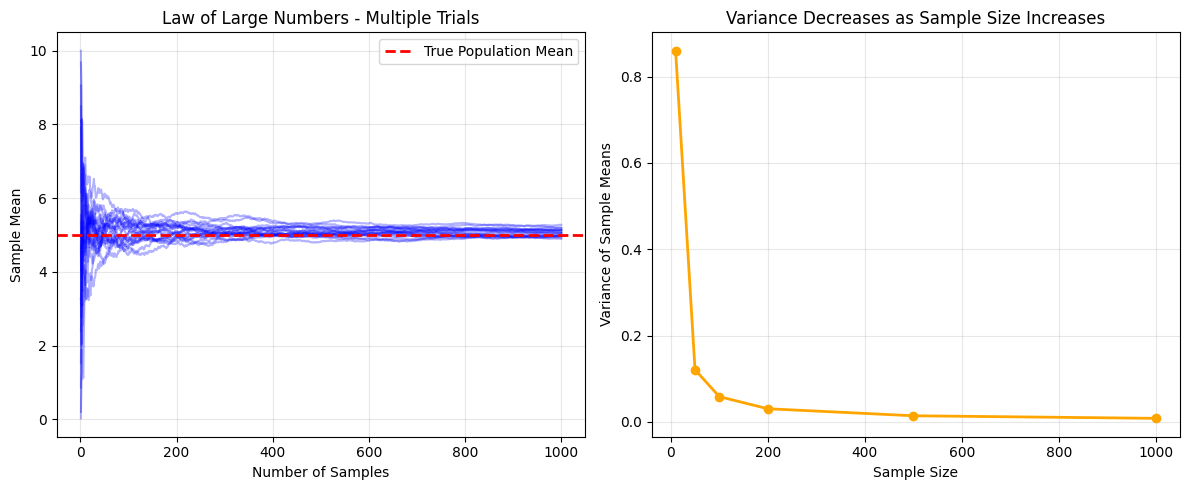

In [5]:
#task 2
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

print("Law of Large Numbers Experiment")

# 1 Generate a population of any distribution

print("\n1. Generating population")

population = np.random.uniform(low=0, high=10, size=100000)

print(f"Population size: {len(population)}")
print(f"Population mean: {np.mean(population):.2f}")
print(f"Distribution: Uniform from 0 to 10")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='blue', alpha=0.7)
plt.title('Population Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(np.mean(population), color='red', linestyle='--', label=f'Mean = {np.mean(population):.2f}')
plt.legend()

# 2 Experiment the Law of Large Numbers

print("\n2. Testing Law of Large Numbers")
population_mean = np.mean(population)

sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
sample_means = []

for n in sample_sizes:
    
    sample = np.random.choice(population, size=n)
    mean = np.mean(sample)
    sample_means.append(mean)
    print(f"Sample size {n:5d}: mean = {mean:.4f}, difference from population = {abs(mean - population_mean):.4f}")

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, sample_means, 'o-', color='green', label='Sample Mean')
plt.axhline(population_mean, color='red', linestyle='--', label=f'Population Mean = {population_mean:.2f}')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.title('Sample Mean vs Sample Size')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3 More detailed experiment - multiple trials
print("\n3. Running multiple trials")

num_trials = 100
max_sample_size = 1000

all_means = []

for trial in range(num_trials):
    sample = np.random.choice(population, size=max_sample_size)
    
    cumulative_means = []
    for i in range(1, max_sample_size + 1):
        cumulative_means.append(np.mean(sample[:i]))
    
    all_means.append(cumulative_means)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for trial_means in all_means[:20]:  
    plt.plot(range(1, max_sample_size + 1), trial_means, alpha=0.3, color='blue')

plt.axhline(population_mean, color='red', linestyle='--', linewidth=2, label='True Population Mean')
plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean')
plt.title('Law of Large Numbers - Multiple Trials')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
variances = []
check_points = [10, 50, 100, 200, 500, 1000]

for n in check_points:
    means_at_n = [trial[n-1] for trial in all_means]
    var = np.var(means_at_n)
    variances.append(var)
    print(f"At n={n:4d}, variance of sample means = {var:.6f}")

plt.plot(check_points, variances, 'o-', color='orange', linewidth=2)
plt.xlabel('Sample Size')
plt.ylabel('Variance of Sample Means')
plt.title('Variance Decreases as Sample Size Increases')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
